In [3]:
import folium                                 # visualization
import geopandas as gpd                        # data analysis and manipulation
import glob                                   # data access
import json                                   # JSON encoder and decoder
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific computing
import os                                     # data access
from folium import plugins                    # visualization
from scripts.credential import username_landsat, password_landsat, username_sentinel, password_sentinel
import pandas as pd
import rasterio as rio

### Import Satellite Imagery

In [4]:
# Path to the satellite image file
img_pre = '../raw_data/stacked_clipped_20230601.tif'
img_post = '../raw_data/stacked_clipped_20230703.tif'

In [20]:
# Read the bands from the PRE satellite image
sat_pre = rio.open(img_pre)

r_pre = sat_pre.read(1)
g_pre = sat_pre.read(2)
b_pre = sat_pre.read(3)

# Read the bands from the POST satellite image

sat_post = rio.open(img_post)

r_post = sat_post.read(1)
g_post = sat_post.read(2)
b_post = sat_post.read(3)


In [25]:
stacked_pre = np.stack([r_pre, g_pre, b_pre], axis=-1)
rgb_pre = stacked_pre.astype(np.uint8)[...,[0,1,2]]

stacked_post = np.stack([r_post, g_post, b_post], axis=-1)
rgb_post = stacked_post.astype(np.uint8)[...,[0,1,2]]

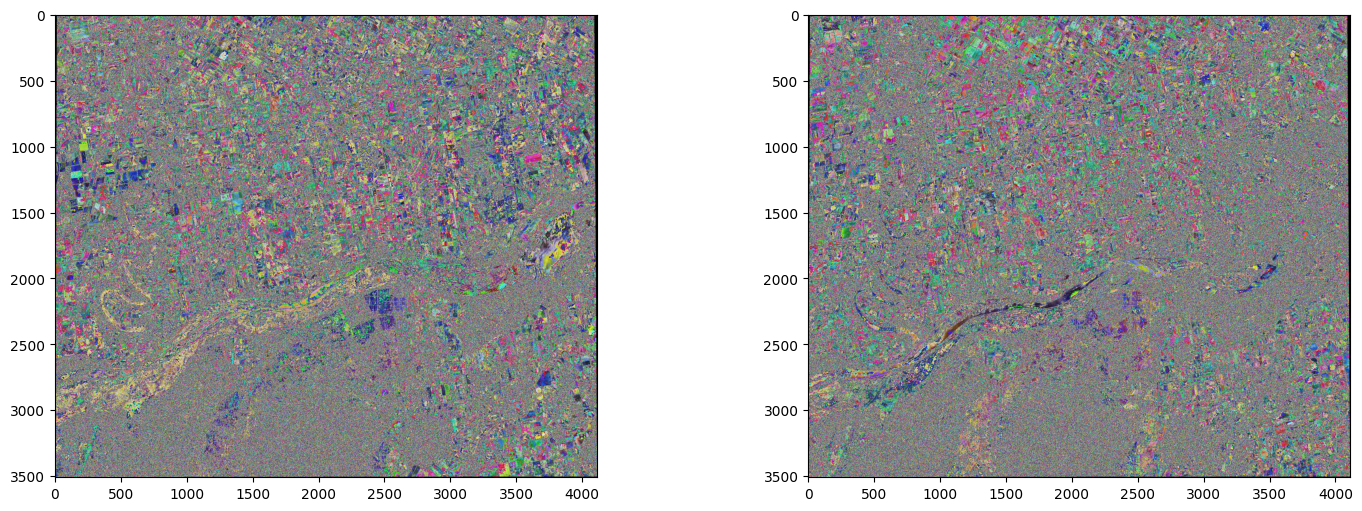

In [26]:
# visualise rgb & segmentation
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), constrained_layout=True)

# Show the RGB image
axs[0].imshow(rgb_pre)
axs[1].imshow(rgb_post)